In [25]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [26]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [27]:
x_train.shape

(50000, 32, 32, 3)

In [28]:
y_train, y_test = y_train.reshape(-1, ), y_test.reshape(-1, )

In [29]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

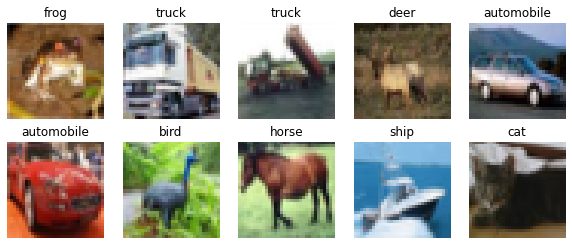

In [30]:
figure, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

for item in zip(axes.ravel(), range(10)):
    ax, num = item
    ax.imshow(x_train[num])
    ax.set_title(classes[y_train[num]])
    ax.axis('off')

In [31]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [32]:
from tensorflow.keras.utils import to_categorical

y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

In [34]:
from keras.models import Sequential
from keras import layers

cnn = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [35]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [36]:
cnn.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.5260 - accuracy: 0.4427
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1708 - accuracy: 0.5856
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0233 - accuracy: 0.6397
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9334 - accuracy: 0.6697
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8664 - accuracy: 0.6975
Epoch 6/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8096 - accuracy: 0.7167
Epoch 7/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7635 - accuracy: 0.7348
Epoch 8/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7287 - accuracy: 0.7435
Epoch 9/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6936 - accuracy: 0.7574
Epoch 10/10
1563/1563 [==============================] - 31s 20m

In [37]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9712 - accuracy: 0.6827


[0.9711846709251404, 0.682699978351593]

In [42]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [43]:
cnn.save('cifar10_cnn.h5')

In [63]:
import cv2

frog = cv2.imread('frog.jpg')
horse = cv2.imread('horse.jpg')
ship = cv2.imread('ship.jpg')
truck = cv2.imread('truck.jpg')

test_images = [frog, horse, ship, truck]
test_names = ['frog', 'horse', 'ship', 'truck']

for i in range(4):
    test_images[i] = cv2.resize(test_images[i], (32, 32))
    test_images[i] = test_images[i].reshape(1, 32, 32, 3)
    test_images[i] = test_images[i].astype('float32') / 255.0


In [67]:
for i in range(4):
    pred = list(cnn.predict(test_images[i])[0])
    print('Expected: ', test_names[i])
    print('Predicted: ', classes[pred.index(max(pred))], end='\n\n')

Expected:  frog
Predicted:  frog

Expected:  horse
Predicted:  horse

Expected:  ship
Predicted:  frog

Expected:  truck
Predicted:  truck

